# Qu'est-ce qu'un modèle linéaire ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.datasets import make_classification, make_regression, make_circles
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Fonction du type $wx+b$

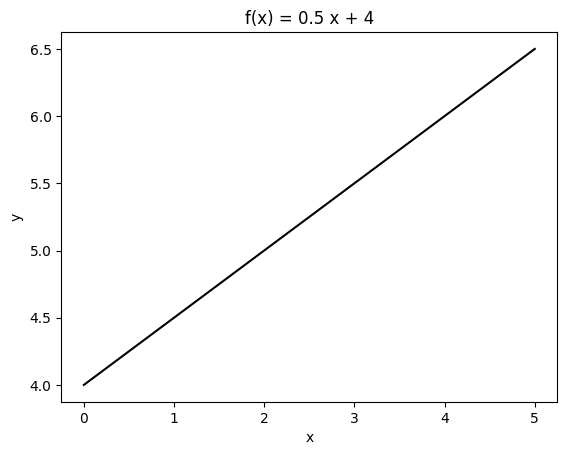

In [2]:
x = np.linspace(0, 5, 100)
a = 0.5
b = 4
y = a * x + b

plt.plot(x, y, c='k')
plt.ylabel('y')
plt.xlabel('x')
plt.title(f'f(x) = {a} x + {b}')
plt.show()

Que l'on peut étendre en 3 dimensions : $w_1x_1 + w_2x_2 + w_3x_3 + b$

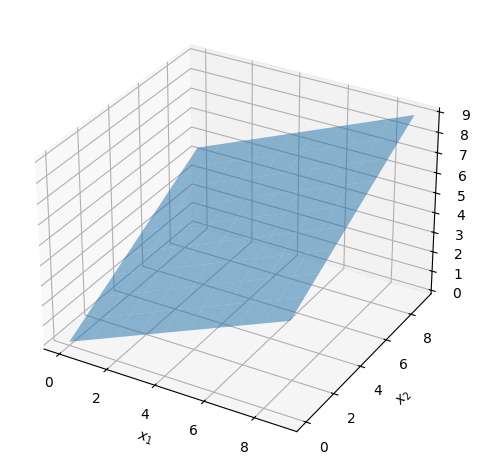

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

xx1, xx2 = np.meshgrid(range(10), range(10))
a = 0.5
b = 0.5
c = 0
z = a * xx1 + b * xx2 + c

# plot the plane
ax.plot_surface(xx1, xx2, z, alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
plt.tight_layout()
plt.show()

Même en haute dimension, le problème peut être linéaire.

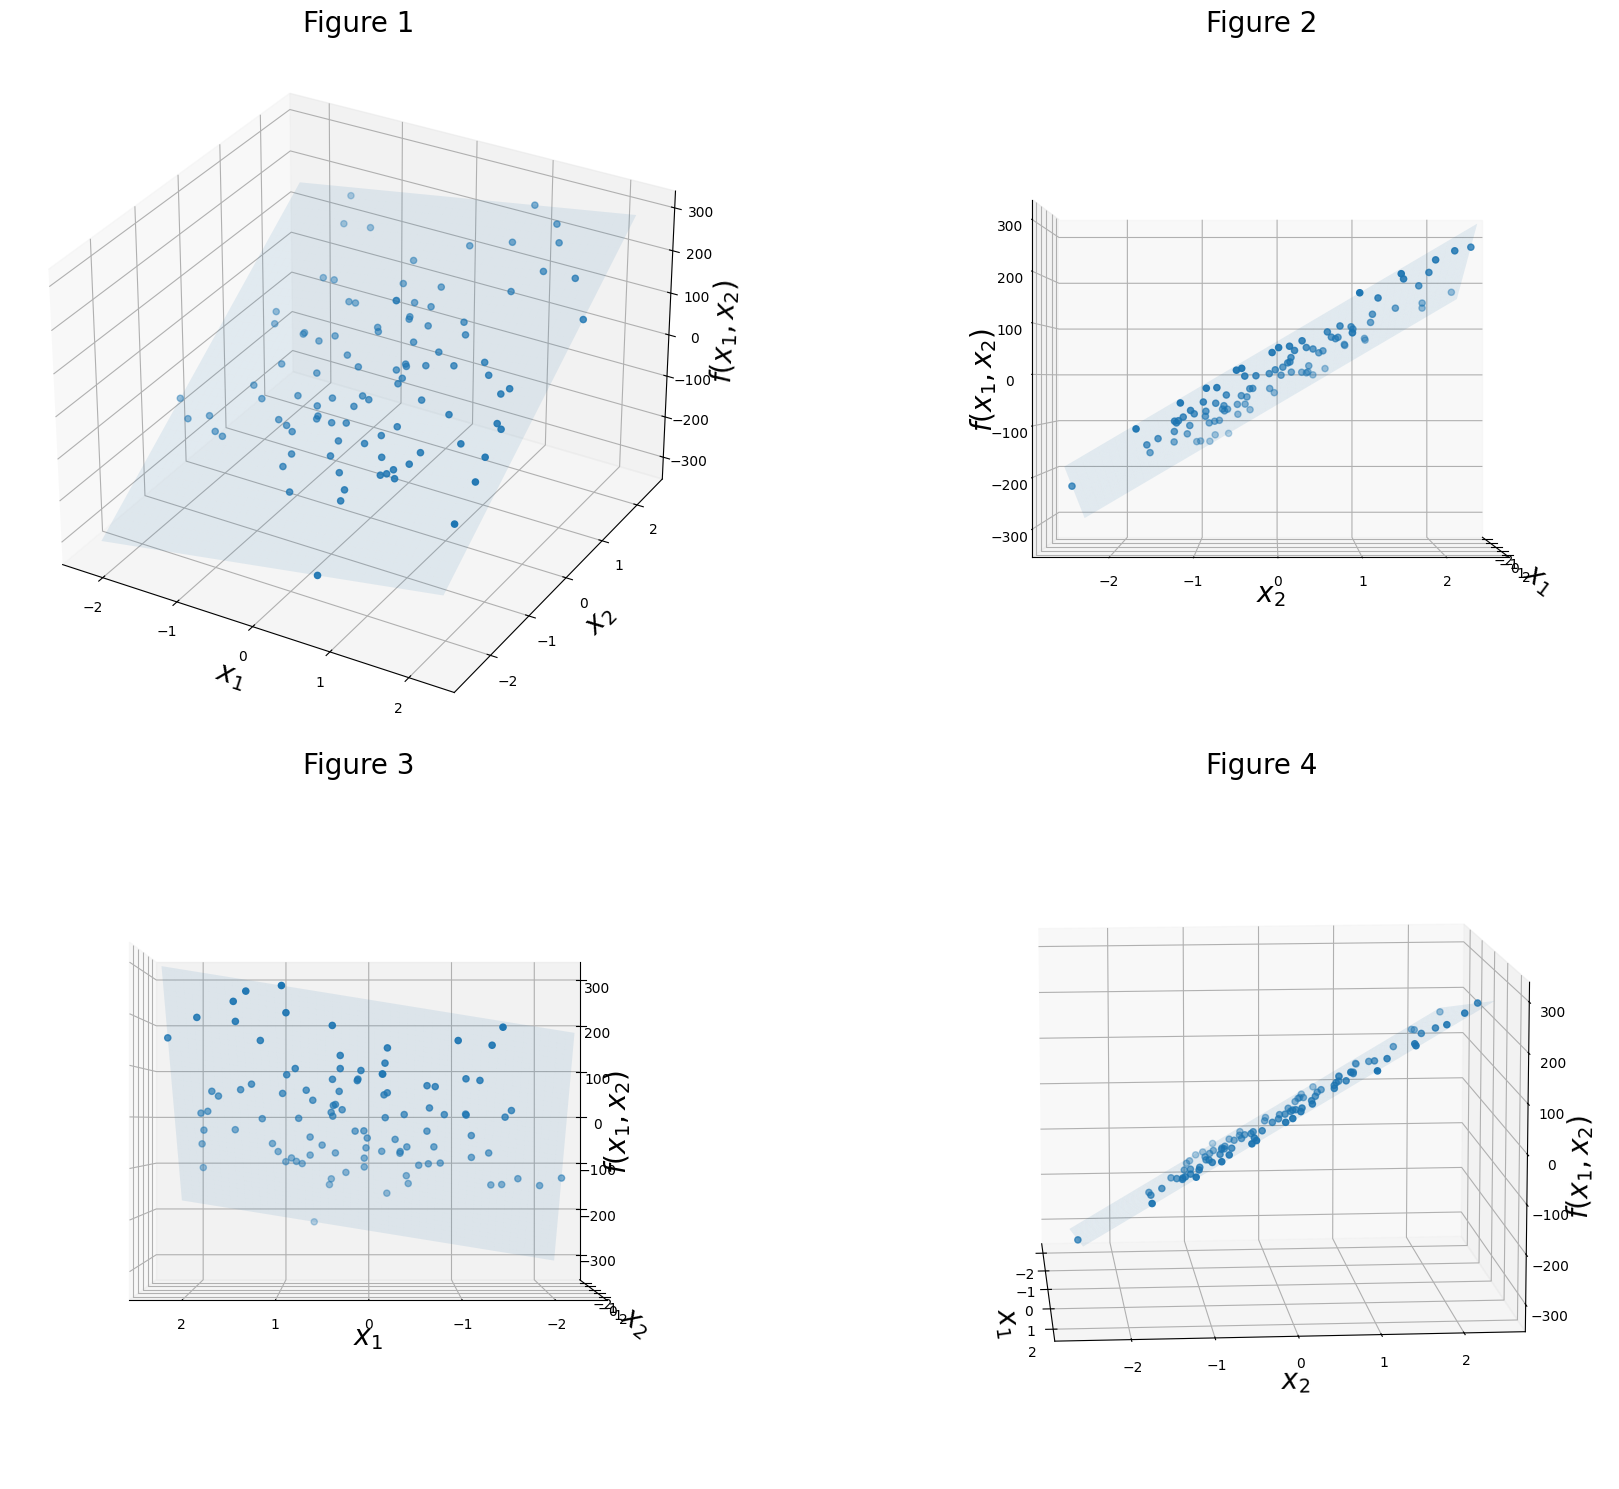

In [4]:
np.random.seed(0)
m = 100
X, y = make_regression(n_samples=m, n_features=2)

model = LinearRegression().fit(X, y)
coefs = model.coef_
bias = model.intercept_

xx1, xx2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), 100),
                       np.linspace(X[:, 1].min(),X[:, 1].max(), 100))
z = coefs[0] * xx1 + coefs[1] * xx2 + bias

fontsize = 20
fig = plt.figure(figsize=(20, 15))

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot_surface(xx1, xx2, z, alpha=0.1)
ax.scatter3D(X[:, 0], X[:, 1], y)
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
ax.set_zlabel('$f(x_1, x_2)$', fontsize=fontsize)
ax.set_title('Figure 1', fontsize=fontsize)

angles = [0, 90, -5]
elev = [0, 0, 10]
for i in range(len(angles)):
  ax = fig.add_subplot(2, 2, i+2,projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], y)
  ax.plot_surface(xx1, xx2, z, alpha=0.1)
  ax.set_xlabel('$x_1$', fontsize=fontsize)
  ax.set_ylabel('$x_2$', fontsize=fontsize)
  ax.set_zlabel('$f(x_1, x_2)$', fontsize=fontsize)
  ax.view_init(elev[i], angles[i])
  ax.set_title(f'Figure {i+2}', fontsize=fontsize)

plt.tight_layout()
plt.show()

Et mêmes si on a des données non linéaires, on peut les transformer pour qu'elles soient linéaires.

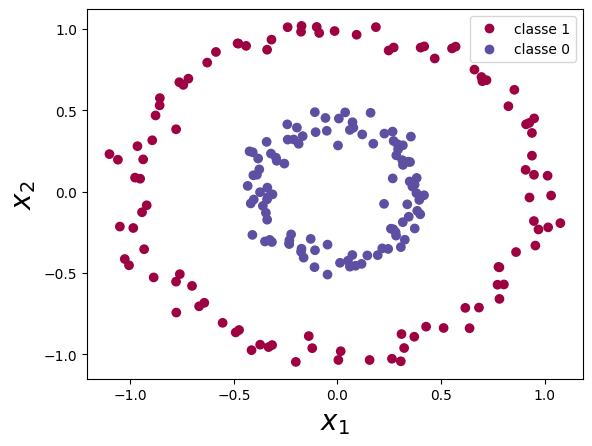

In [5]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=0)
ax = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Spectral')
plt.xlabel('$x_1$', fontsize=fontsize)
plt.ylabel('$x_2$', fontsize=fontsize)
plt.legend(ax.legend_elements()[0], ('classe 1', 'classe 0'))
plt.show()

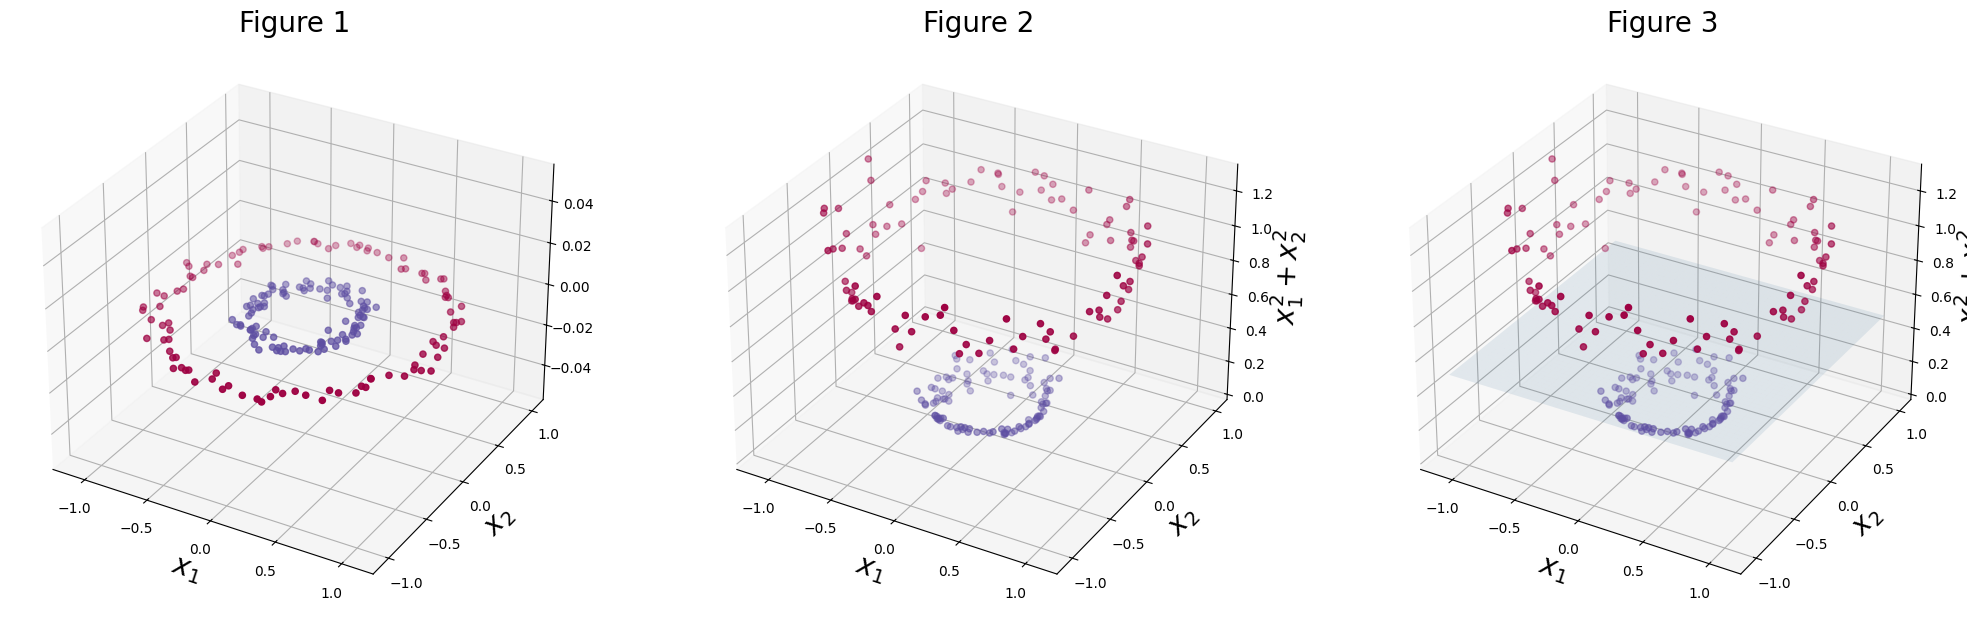

In [6]:
X, y = make_circles(n_samples=200, noise=0.05, factor=0.4, random_state=0)
# X = PolynomialFeatures(2).fit_transform(X)

Z = X[:, 0]**2 + X[:, 1]**2
fontsize = 20
fig = plt.figure(figsize=(25, 8))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], 0, c=y, cmap='Spectral')
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
# ax.set_zlabel('$f(x_1, x_2)$', fontsize=fontsize)
ax.set_title('Figure 1', fontsize=fontsize)

ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, cmap='Spectral')
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
ax.set_zlabel('$x_1^2 + x_2^2$', fontsize=fontsize)
ax.set_title('Figure 2', fontsize=fontsize)

xx1, xx2 = np.meshgrid(np.linspace(X[:, 0].min(),X[:, 0].max(), 100),
                       np.linspace(X[:, 1].min(),X[:, 1].max(), 100))

ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, cmap='Spectral')
Z = (xx1 + xx2) * 0 + 0.5

ax.plot_surface(X = xx1, Y = xx2, Z = Z, alpha=0.1)
ax.set_xlabel('$x_1$', fontsize=fontsize)
ax.set_ylabel('$x_2$', fontsize=fontsize)
ax.set_zlabel('$x_1^2 + x_2^2$', fontsize=fontsize)
ax.set_title('Figure 3', fontsize=fontsize)
plt.show()